**A brief description of this project:**

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest (Fandango is an online movie ratings aggregator).

Fandango displays a 5-star rating system on their website, where the minimum rating is 0 stars and the maximum is 5 stars.

Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page. He was able to find that:

- The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect.
- In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.
- For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars.

Fandango's officials replied that the biased rounding off was caused by a bug in their system rather than being intentional, and they promised to fix the bug as soon as possible. Presumably, this has already happened, although we can't tell for sure since the actual rating value doesn't seem to be displayed anymore in the pages' HTML.

In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

**How we will test whether there has been a change in the rating system:**

Walt Hickey made the data he analyzed publicly available on [Github](https://github.com/fivethirtyeight/data/tree/master/fandango). We'll use the data he collected to analyze the characteristics of Fandango's rating system previous to his analysis.

We use some [data gathered for movies released in 2016 and 2017](https://github.com/mircealex/Movie_ratings_2016_17) to analyze the rating system's characteristics after Hickey's analysis.

In [133]:
import pandas as pd

pd.options.display.max_columns=50

previous = pd.read_csv("fandango_score_comparison.csv")
after = pd.read_csv("movie_ratings_16_17.csv")

In [134]:
previous.head(2)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5


In [135]:
after.head(2)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.8,3.60,4.5,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.4,3.65,2.5,4.15,2.5,3.5,2.5,4.0


**Let's isolate the columns applicable to Fandango:**

In [136]:
fan_prev = previous[["FILM","Fandango_Stars","Fandango_Ratingvalue","Fandango_votes","Fandango_Difference"]]

In [137]:
fan_prev.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5


In [138]:
fan_after = after[["movie","year","fandango"]]

In [139]:
fan_after.head(2)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5


**Our Goal:**

Our goal is to determine whether there has been any change in Fandango's ratings after the release of Hickley's article. The population of interest is all of the movies rated on Fandango's website regardless of year.

**Our samples:**

As we are trying to determine whether the ratings characteristics changed after the release of the article, we need to sample the population at two points in time with one sample of movies released prior to 2015 and one after 2015.

The data we're working with was sampled at the moments we want: one sample was taken previous to the analysis, and the other after the analysis. We want to describe the population, so we need to make sure that the samples are representative, otherwise we should expect a large sampling error and, ultimately, wrong conclusions.

From [Hickley's article](https://fivethirtyeight.com/features/fandango-movies-ratings/) and the [README.md file](https://github.com/fivethirtyeight/data/blob/master/fandango/README.md) of the data set's repository we can see the following:

- All of the movies in this sample had at least 30 reviews
- The movie had tickets on sale in 2015

The sampling was clearly not random because not every movie had the same chance to be included in the sample — some movies didn't have a chance at all (like those having under 30 fan ratings or those without tickets on sale in 2015). It's questionable whether this sample is representative of the entire population we want to describe. It seems more likely that it isn't, mostly because this sample is subject to temporal trends — e.g. movies in 2015 might have been outstandingly good or bad compared to other years.

The sampling conditions of our other sample (after) can be found [here](https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md). From this we can see the following:

- Only the movies with "A significant number of votes" were selected. It is not clear from the README.md file what constitutes "significant"
- These movie was released in 2016 or 2017

Thus the second sample also shows temporaral trends and is also only representitative of popular movies.

Our goal as stated above is to determine whether there has been any change in Fandango's ratings after the release of the article but given that our samples are not truely representative of the population (All movies on Fandango), this is not possible.

**An alternative goal:**

Our new goal is to determine whether the rating system for popular movies on fandango's website has changed as a result of the article. It should be noted that this should serve as a reasonable proxy for our initial goal.

**Sample inspection:**

With this new research goal, we have two populations of interest:

- All Fandango's ratings for popular movies released in 2015.
- All Fandango's ratings for popular movies released in 2016.

Let's determine if all movies have 30 or more fan ratings.

In [140]:
fan_prev["Fandango_votes"].describe()

count      146.000000
mean      3848.787671
std       6357.778617
min         35.000000
25%        222.250000
50%       1446.000000
75%       4439.500000
max      34846.000000
Name: Fandango_votes, dtype: float64

As we can see from the above series, the min `Fandango_votes` is 35 and thus none are below 30.

In terms of the second sample, no information is provided in the sample itself as to whether each movie has ben rated 30 or more times and so we will have to inspect this manually on Fandango's website. Only a sample of 5 movies will be selected in the interest of time and each sample will be from 2016.

In [141]:
fan_after.loc[fan_after["year"]==2016]["movie"].sample(5, random_state=1)

36                       Collide
75     Ice Age: Collision Course
125             Now You See Me 2
171     The Disappointments Room
92      Kubo and the Two Strings
Name: movie, dtype: object

Ran ratings:

- Collide - 335
- Ice Age: Collision Course - 2,242
- Now You See Me 2 - 6,215
- The Disappointments Room - 383
- Kubo and the Two Strings - 4,008

It should be noted that these ratings have been obtained as at 15/02/2019 and thus there has been time since 2016 for these movies to be rated. Thus it is likely that the ratings count for each movie was lower at the end of 2017 when the data was collected. It should also be noted, however, that it is likely that the majority of ratings occur in the year in which the movie is released and as the movie rated the lowest number of times in our sample (Collide - 335) is more than 11 times the lower limit of 30, it is safe to assume that the movie had ben rated at least 30 times at the date the data was collected.

Let's also verify that all movies in the `fan_prev` sample were released in 2015 and also isolate the `fan_after` movies released in 2016.

In [142]:
# First let's add a year column to fan_prev
fan_prev["year"] = fan_prev["FILM"].str[-5:-1]

fan_prev["year"] = pd.to_numeric(fan_prev["year"])

samp_15 = fan_prev.loc[fan_prev["year"]==2015]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [143]:
samp_15["year"].value_counts()

2015    129
Name: year, dtype: int64

In [144]:
samp_16 = fan_after.loc[fan_after["year"]==2016]

In [145]:
samp_16["year"].value_counts()

2016    191
Name: year, dtype: int64

**Let's analyse the shapes of the distributions:**

Text(0.5, 1.0, 'Fandango Movie Ratings in 2015 vs 2016')

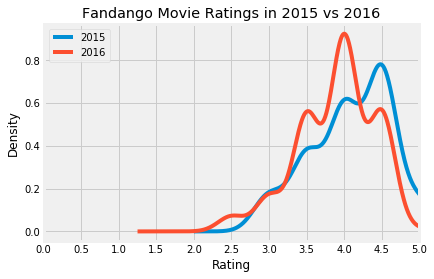

In [146]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

%matplotlib inline

samp_15["Fandango_Stars"].plot.kde(label="2015", legend=True)
samp_16["fandango"].plot.kde(label="2016", legend=True)
plt.xticks(np.arange(0,5.1,.5))
plt.xlim(0,5)
plt.legend(loc=2)
plt.xlabel("Rating")
plt.title("Fandango Movie Ratings in 2015 vs 2016")


**Results of analysis:**

- Both plots are negatively skewed with the 2015 plot being more so than the 2016 plot which is closer to normal.
- The most common value in 2015 was 4.5 while the most common value in 2016 was 4.
- The 2016 plot shows that some movies were rated 2.5 while the lowest rated movie in 2015 was 3.0.
- The 2016 plot shows a higher probability for each rating other than 4.5 and 5.

The above indicates that Fandango did indeed correct their ratings. The plots strongly indicate the absence of the misleading rounding up that was found by Hickley.

Fandango now seems to use the range of ratings more copletely and doesn't stick to higher ratings. This can be seen in the marked decrease in the probability of 5 and 4.5 star ratings and the increase in probability of 4 and 3.5 star ratings.

**Let's look at the dta on a more granular level by examining the frequency tables:**

In [147]:
freq_15 = samp_15["Fandango_Stars"].value_counts(normalize=True).sort_index()
freq_15[2.5]=0

freq_16 = samp_16["fandango"].value_counts(normalize=True).sort_index()

freq_diff = freq_16 - freq_15

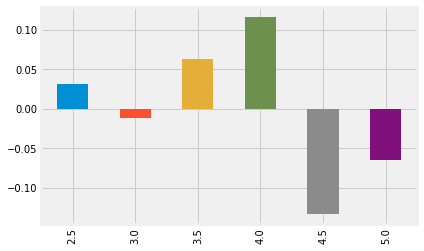

In [148]:
freq_diff.plot.bar()

From the above we can clearly see that the probabilities of a 4.5 or 5 decreased markedly from 2015 to 2016 while the percentages of 2.5, 3.5 and 4 increased.

This indicates that movies that were previously rated higher later rated more normally.

**Let's compare the summary statistics:**

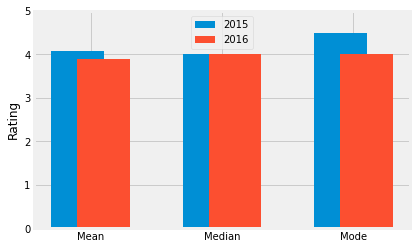

In [190]:
mean_15 = samp_15["Fandango_Stars"].mean()
median_15 = samp_15["Fandango_Stars"].median()
mode_15 = samp_15["Fandango_Stars"].mode()

mean_16 = samp_16["fandango"].mean()
median_16 = samp_16["fandango"].median()
mode_16 = samp_16["fandango"].mode()

x_vals1 = [1,3,5]
x_vals2 = [1.4,3.4,5.4]
y_vals1 = [mean_15,median_15,mode_15]
y_vals2 = [mean_16,median_16,mode_16]

plt.bar(x=x_vals1,height=y_vals1, label="2015")
plt.bar(x=x_vals2,height=y_vals2, label="2016")

plt.xticks([1.2,3.2,5.2],["Mean","Median","Mode"])

plt.ylabel("Rating")

plt.ylim(0,5)

plt.legend(loc="upper center")

As we can see, the mode and the mean do seem to have dropped from 2015 to 2016.

**Conclusion:**

As a result of our analysis above, we can conclude that the Fandango ratings for popular movies have most likely decreased from 2015 to 2016. This is likely as a result of Hickley's article.

Further, in light of the above it is likely that this trend is followed accross all movies and not just the popular ones.